# CRISP-DM 

This notebook follows the **CRISP-DM (Cross Industry Standard Process for Data Mining)** methodology:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

The project aims to build a Quadrant Stock Classification System using **deep learning models**.


## Business Understanding

a. To help investors analyze stocks more quickly and accurately.

b. To establish a standard for stock analysis that is easy to understand and practical.

c. To reduce risks from uninformed investment decisions and build confidence among investors

## Data Understanding

ดึงชื่อหุ้นของประเทศไทย

[coding name stock](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/1.Pull_the_name_of_Thai_stocks/name_stock.ipynb)

ดึงข้อมูลจากAPI Settrade API 

ข้อมูลพื้นฐานของหุ้นดึงมาจาก https://developer.settrade.com/open-api/api-reference/reference/sdkv2/python/market-data/getQuoteSymbol

[coding fundematal](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/data_finan_setAPI.ipynb)

ข้อมูลของTechnical Data.

 https://developer.settrade.com/open-api/api-reference/reference/sdkv2/python/market-historical-data/2_getCandlestick 
 
 โดยดึงล่าสุดวันที่1 เดือน10 ปี68 

[Technical Data](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/Technical_data.ipynb)

โหลดข้อมูลเข้าฐานข้อมูลcassandra เเละ โหลดข้อมูลที่ใช้ลงexcel 

ข้อมูลของพื้นฐานของหุ้น เอาคอลัมท์ symbol,eps,pe,pbv,percentYield 

เเละข้อมูลของเทคนิค ดึงตั่งเเต่วันที่1 เดือนjune 2025 (2025-06-01)

[coding save to excel](https://github.com/phqsuema123/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/blob/main/1.Final_file/2.Data_collection/savetoexcel.ipynb)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fun=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_fun.xlsx")

In [3]:
df_tn=pd.read_excel("C:/Users/Admin/OneDrive/Desktop/Stock-quadrant-quantitative-analysis-using-deep-learning-classification/1.Final_file/2.Data_collection/stock_june2025_onwards.xlsx")

## Data Preparation

สำรวจข้อมูลแท่ง บรรทัด คอลัมท์ ข้อมูลmissing(NAN) ข้อมูลสรุปสถิติ 

In [4]:
print(df_tn.shape)
print(df_tn.isnull().sum())
print(df_tn.describe())

(69362, 8)
symbol         0
time           0
close_price    0
high_price     0
low_price      0
open_price     0
value          0
volume         0
dtype: int64
                                time   close_price    high_price  \
count                          69362  69362.000000  69362.000000   
mean   2025-08-01 21:57:51.906807552      9.963896     10.069459   
min              2025-06-04 00:00:00      0.010000      0.010000   
25%              2025-07-02 00:00:00      0.900000      0.910000   
50%              2025-08-01 00:00:00      2.680000      2.720000   
75%              2025-09-02 00:00:00      7.158460      7.250000   
max              2025-10-01 00:00:00    350.000000    360.000000   
std                              NaN     29.165057     29.381371   

          low_price    open_price          value        volume  
count  69362.000000  69362.000000   69362.000000  6.936200e+04  
mean       9.858781      9.962452       7.314754  5.693653e+06  
min        0.010000      0.01000

สำรวจข้อมูลพท้นฐาน บรรทัด คอลัมท์ ข้อมูลmissing(NAN) ข้อมูลสรุปสถิติ 

In [5]:
print(df_fun.shape)
print(df_fun.isnull().sum())
print(df_fun.describe())

(907, 7)
symbol           0
eps             64
pe              71
pbv              8
percentyield     7
volume           0
marketcap        0
dtype: int64
              eps            pe         pbv  percentyield        volume  \
count  843.000000    836.000000  899.000000    900.000000  9.070000e+02   
mean     0.416486     29.970897    1.181869      3.909367  4.594697e+06   
std      2.098391    455.065368    1.845644      3.944323  1.986407e+07   
min    -11.024490      0.000000    0.000000      0.000000  1.000000e+02   
25%     -0.008735      0.000000    0.490000      0.000000  4.120000e+04   
50%      0.070000      9.325000    0.770000      3.280000  3.178100e+05   
75%      0.277725     15.457500    1.280000      6.492500  2.076406e+06   
max     36.741980  13142.170000   33.130000     24.910000  4.516564e+08   

          marketcap  
count  9.070000e+02  
mean   4.609440e+07  
std    2.740798e+08  
min    1.800000e+02  
25%    8.427056e+04  
50%    5.555000e+05  
75%    4.324607

ดรอปข้อมูล NAN

In [6]:
df_fun.dropna(inplace=True)

In [7]:
print(df_fun.isnull().sum())
print(df_fun.shape)

symbol          0
eps             0
pe              0
pbv             0
percentyield    0
volume          0
marketcap       0
dtype: int64
(836, 7)


data vizulation

เส้นค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โพเนนเชียล (Exponential Moving Average - EMA)

คือเส้นค่าเฉลี่ยของราคาหุ้นย้อนหลังในระยะเวลาต่างๆ กัน (5, 15, 35, 89, และ 200 วัน) โดยให้ความสำคัญกับราคาล่าสุดมากกว่า เส้นเหล่านี้ช่วยบอกถึงแนวโน้มในระยะสั้นไปจนถึงระยะยาว

🔵 EMA5 = ระยะสั้น, สัญญาณไว

🟠 EMA15 = ระยะกลาง, ช่วยกรองสัญญาณ

🟢 EMA35 = แนวโน้มกลาง

🟣 EMA89 = แนวโน้มหลัก

🔴 EMA200 = แนวโน้มระยะยาว (เส้นใหญ่สุด)

โดยทั่วไปจำนวน “5, 15, 35, 89, 200” ของ EMA มักอิงกับจำนวน “วันทำการซื้อขาย (trading days)”**
ซึ่งหมายถึง **วันทำงานของตลาดหุ้น (วันราชการที่ตลาดเปิด)** ไม่รวมเสาร์–อาทิตย์ หรือวันหยุดนักขัตฤกษ์ของตลาดหลักทรัพย์

---

### 💡 อธิบายอย่างละเอียด

| ค่า EMA    | ช่วงเวลาโดยประมาณ | อิงจาก       | ใช้เพื่อวิเคราะห์อะไร                                    |
| ---------- | ----------------- | ------------ | -------------------------------------------------------- |
| **EMA5**   | ~1 สัปดาห์        | 5 วันทำการ   | แนวโน้มระยะสั้นมาก (daily momentum)                      |
| **EMA15**  | ~3 สัปดาห์        | 15 วันทำการ  | แนวโน้มระยะสั้น                                          |
| **EMA35**  | ~7 สัปดาห์        | 35 วันทำการ  | แนวโน้มระยะกลาง                                          |
| **EMA89**  | ~4 เดือน          | 89 วันทำการ  | แนวโน้มระยะกลางถึงยาว                                    |
| **EMA200** | ~10 เดือน         | 200 วันทำการ | แนวโน้มระยะยาว (ใช้บ่อยในตลาดโลก เช่น S&P500, SET Index) |

---

### 📆 ตัวอย่างการแปลงเป็น “ระยะเวลาในปฏิทินจริง”

โดยทั่วไปตลาดหุ้นไทย (SET) เปิดทำการประมาณ **21–22 วันต่อเดือน**
ดังนั้นเราจะได้โดยประมาณว่า:

| ค่า    | คิดเป็นวันทำการ | เทียบเป็น “ระยะเวลาในปฏิทิน” |
| ------ | --------------- | ---------------------------- |
| EMA5   | 1 สัปดาห์       | 1 สัปดาห์                    |
| EMA15  | 3 สัปดาห์       | ~3 สัปดาห์                   |
| EMA35  | 7 สัปดาห์       | ~1.5 เดือน                   |
| EMA89  | 4 เดือน         | ~4 เดือน                     |
| EMA200 | 10 เดือน        | ~10 เดือน – 1 ปี             |

---

### 🔍 สรุปสั้น ๆ

> ค่าของ **EMA 5, 15, 35, 89, 200** มาจาก “จำนวนวันทำการของตลาดหุ้น” (Trading Days)
> ซึ่งถือเป็น “วันราชการที่ตลาดหลักทรัพย์เปิด”
> และถูกเลือกเพื่อให้ครอบคลุมแนวโน้มหลายระดับ — จากสั้นที่สุด (EMA5) ถึงยาวที่สุด (EMA200)

In [8]:
import plotly.graph_objects as go

# 🔹 เลือกเฉพาะหุ้น 24CS
ohlc_df = df_tn[df_tn["symbol"] == "DELTA"].copy()

# 🔹 จัดการ index
ohlc_df["time"] = pd.to_datetime(ohlc_df["time"])
ohlc_df = ohlc_df.sort_values("time")
ohlc_df = ohlc_df.set_index("time")
ohlc_df.index.name = "Date"

# 🔹 Rename columns ให้ตรงกับ Plotly
ohlc_df = ohlc_df.rename(columns={
    "open_price": "Open",
    "high_price": "High",
    "low_price": "Low",
    "close_price": "Close",
    "volume": "Volume"
})

# 🔹 เลือกแค่ 200 วันล่าสุด (เพื่อดูง่าย)
ohlc_df = ohlc_df.tail(200)

# 🔹 คำนวณ EMA
for p in [5, 15, 35, 89, 200]:
    ohlc_df[f"EMA{p}"] = ohlc_df["Close"].ewm(span=p, adjust=False).mean()

# ✅ กราฟ Candlestick
fig = go.Figure(data=[go.Candlestick(
    x=ohlc_df.index,
    open=ohlc_df['Open'],
    high=ohlc_df['High'],
    low=ohlc_df['Low'],
    close=ohlc_df['Close'],
    name="Candlestick"
)])

# ✅ เส้น EMA
colors = {5:"blue", 15:"orange", 35:"green", 89:"purple", 200:"red"}
for p in [5, 15, 35, 89, 200]:
    fig.add_trace(go.Scatter(
        x=ohlc_df.index,
        y=ohlc_df[f"EMA{p}"],
        mode="lines",
        line=dict(width=2, color=colors[p]),
        name=f"EMA{p}"
    ))

# ✅ Volume
fig.add_trace(go.Bar(
    x=ohlc_df.index,
    y=ohlc_df['Volume'],
    name="Volume",
    marker_color="lightblue",
    opacity=0.5,
    yaxis="y2"
))

# ✅ Layout
fig.update_layout(
    title="DELTA Stock Candlestick Chart with EMA(5,15,35,89,200) and Volume",
    yaxis=dict(title="Price", domain=[0.3, 1]),
    yaxis2=dict(title="Volume", domain=[0, 0.25]),
    xaxis=dict(title="Date"),
    xaxis_rangeslider_visible=False,
    template="plotly_white",
    width=950,
    height=600
)

fig.show()

### Technical Data Grouping

We categorize stock market technical signals using **Exponential Moving Averages (EMA)** and **Relative Strength Index (RSI)**.

* **a: Strong Momentum / Overbought**

  * Condition: `Close ≥ EMA5` **and** `RSI ≥ 70`
  * Interpretation: The stock is in an **overbought zone** with very strong upward momentum.

* **b: Clear Uptrend**

  * Condition: `Close ≥ EMA35` **and** `EMA35 ≥ EMA89`
  * Interpretation: The stock is trending upward, showing medium-term bullish strength.

* **c: Sideways above EMA89**

  * Condition: `Close ≥ EMA89` **and** short-term EMAs (5/15/35/89) are close together:

    $$
    \frac{\max(EMA) - \min(EMA)}{\text{mean}(EMA)} \leq band\_pct \quad (default = 1.5\%)
    $$
  * Interpretation: The stock is moving **sideways** but remains above the long-term EMA89, indicating consolidation.

* **d: Downtrend**

  * Condition: `Close < EMA89` **and** `Close < EMA200` **and** `EMA89 < EMA200`
  * Interpretation: The stock is in a **bearish trend**, moving below key long-term averages.

* **e: Crash**

  * Condition: Strong descending order → `Close < EMA5 < EMA15 < EMA35 < EMA89 < EMA200` **and** `RSI ≤ 30`
  * Interpretation: The stock is in a **sharp decline (crash)** with strong bearish momentum and oversold conditions.

---

In [9]:
import pandas as pd
import numpy as np
import ta

def compute_technical_grades(df_candle, band_pct=0.015):
    df_result = []

    for symbol, df_sym in df_candle.groupby('symbol'):
        df_sym = df_sym.sort_values('time').copy()
        df_sym = df_sym.dropna(subset=['close_price'])

        if len(df_sym) < 50:
            continue

        # ✅ คำนวณ EMA และ RSI
        df_sym['ema5']   = df_sym['close_price'].ewm(span=5).mean()
        df_sym['ema15']  = df_sym['close_price'].ewm(span=15).mean()
        df_sym['ema35']  = df_sym['close_price'].ewm(span=35).mean()
        df_sym['ema89']  = df_sym['close_price'].ewm(span=89).mean()
        df_sym['ema200'] = df_sym['close_price'].ewm(span=200).mean()
        df_sym['rsi']    = ta.momentum.RSIIndicator(close=df_sym['close_price'], window=14).rsi()

        df_sym = df_sym.dropna(subset=['ema5','ema15','ema35','ema89','ema200','rsi'])
        if df_sym.empty:
            continue

        # ✅ ใช้ข้อมูลล่าสุด
        row = df_sym.iloc[-1]
        c, r = row['close_price'], row['rsi']
        e5, e15, e35, e89, e200 = row['ema5'], row['ema15'], row['ema35'], row['ema89'], row['ema200']

        # ✅ Logic grading
        if c >= e5 and r >= 70:
            grade = 'a'
        elif c >= e35 and e35 >= e89:
            grade = 'b'
        elif c >= e89 and (max([e5,e15,e35,e89]) - min([e5,e15,e35,e89])) / np.mean([e5,e15,e35,e89]) <= band_pct:
            grade = 'c'
        elif c < e89 and c < e200 and e89 < e200:
            grade = 'd'
        elif c < e5 < e15 < e35 < e89 < e200 and r <= 30:
            grade = 'e'
        else:
            grade = 'c'

        # ✅ บันทึกค่าทั้งหมด รวม EMA และ RSI
        df_result.append({
            'symbol': symbol,
            'time': row['time'],
            'close_price': row['close_price'],
            'high_price': row['high_price'],
            'low_price': row['low_price'],
            'open_price': row['open_price'],
            'value': row['value'],
            'ema5': e5,
            'ema15': e15,
            'ema35': e35,
            'ema89': e89,
            'ema200': e200,
            'rsi': r,
            'trend_grade': grade
        })

    return pd.DataFrame(df_result)


In [10]:
df_result = compute_technical_grades(df_tn) 

### ✅ **1. EMA (Exponential Moving Average)**

> ใช้เพื่อบ่งบอกแนวโน้ม (trend) ของราคาหุ้นในช่วงเวลาต่าง ๆ

| ค่า        | สูตร / ความหมาย                              | ใช้สำหรับ                                    |
| ---------- | -------------------------------------------- | -------------------------------------------- |
| **ema5**   | ค่าเฉลี่ยเคลื่อนที่แบบเอ็กซ์โปเนนเชียล 5 วัน | แนวโน้มระยะสั้นมาก                           |
| **ema15**  | ค่าเฉลี่ยเคลื่อนที่ 15 วัน                   | แนวโน้มระยะสั้น                              |
| **ema35**  | ค่าเฉลี่ยเคลื่อนที่ 35 วัน                   | แนวโน้มระยะกลาง                              |
| **ema89**  | ค่าเฉลี่ยเคลื่อนที่ 89 วัน                   | แนวโน้มระยะยาว                               |
| **ema200** | ค่าเฉลี่ยเคลื่อนที่ 200 วัน                  | แนวโน้มระยะยาวมาก (บ่งบอกแนวโน้มหลักของตลาด) |

**สูตรทั่วไปของ EMA:**
[
EMA_t = (P_t \times k) + (EMA_{t-1} \times (1 - k))
]
โดยที่

* ( P_t ) = ราคาปิดของวันปัจจุบัน
* ( k = \frac{2}{N+1} ), เมื่อ ( N ) คือจำนวนวันที่ใช้คำนวณ (เช่น 5, 15, 35, 89, 200)
* ใช้ข้อมูลราคาปิด (`close_price`) จาก API หรือฐานข้อมูล Cassandra

**ใน Python:**

```python
import pandas as pd

df['ema5'] = df['close_price'].ewm(span=5, adjust=False).mean()
df['ema15'] = df['close_price'].ewm(span=15, adjust=False).mean()
df['ema35'] = df['close_price'].ewm(span=35, adjust=False).mean()
df['ema89'] = df['close_price'].ewm(span=89, adjust=False).mean()
df['ema200'] = df['close_price'].ewm(span=200, adjust=False).mean()
```

---

### ✅ **2. RSI (Relative Strength Index)**

> ใช้เพื่อวัด “แรงซื้อ–แรงขาย” และระดับ Overbought / Oversold

**สูตรทั่วไปของ RSI:**
[
RSI = 100 - \frac{100}{1 + RS}
]
โดยที่
[
RS = \frac{\text{ค่าเฉลี่ยกำไร (Average Gain)}}{\text{ค่าเฉลี่ยขาดทุน (Average Loss)}}
]
มักใช้คำนวณในช่วง **14 วัน (RSI14)**

**ใน Python:**

```python
import pandas as pd

delta = df['close_price'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
df['rsi'] = 100 - (100 / (1 + rs))
```

---

### ✅ **3. แหล่งข้อมูลต้นทาง**

จากรายงานโครงงานของคุณระบุว่า

> “The stock data for analysis is retrieved from **SETTRADE Open API** and stored in a PostgreSQL database. Technical Data includes close, high, low, open, value, volume...”

ดังนั้นค่าพวกนี้ถูกคำนวณจาก **ราคาปิดของหุ้นแต่ละตัวในแต่ละวัน** ที่ได้จาก API (หรือจากตาราง Cassandra เช่น `candlestick_data`) แล้วสร้างเป็นฟีเจอร์ใหม่ในขั้นตอน Feature Engineering ก่อนนำเข้าโมเดล Deep Learning

---

สรุปสั้น ๆ:

| Indicator     | ที่มาจาก                 | ใช้บอกอะไร                |
| ------------- | ------------------------ | ------------------------- |
| `ema5–ema200` | ราคาปิด (`close_price`)  | แนวโน้มของราคา (trend)    |
| `rsi`         | การเปลี่ยนแปลงของราคาปิด | แรงซื้อ–แรงขาย (momentum) |

In [11]:
df_result.head(10)

,symbol,time,close_price,high_price,low_price,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade
0,24CS,2025-10-01,1.14,1.14,1.13,1.13,43498,1.394893,1.408289,1.357985,1.326928,1.317656,37.621724,c
1,2S,2025-09-30,2.62,2.66,2.62,2.66,0,2.668552,2.702923,2.667533,2.578062,2.527286,41.847623,c
2,3BBIF,2025-09-30,6.50,6.60,6.45,6.60,0,6.525378,6.517466,6.424244,6.290236,6.223712,52.051964,b
3,A,2025-09-30,4.84,4.86,4.84,4.86,0,4.843595,4.842305,4.842802,4.846905,4.849548,49.416702,d
4,A5,2025-10-01,1.87,1.87,1.87,1.87,187,1.883256,1.881561,1.880982,1.896469,1.910181,46.558915,d
5,AAI,2025-09-30,4.90,5.00,4.90,4.90,0,4.927358,4.929880,4.864235,4.732070,4.658863,50.403746,b
6,AAV,2025-09-30,1.27,1.29,1.25,1.28,0,1.278322,1.296927,1.290124,1.262610,1.245126,45.279678,c
7,ABM,2025-09-30,0.81,0.85,0.81,0.84,0,0.838448,0.829629,0.782279,0.722080,0.693195,51.614097,b
8,ACC,2025-09-30,0.53,0.56,0.52,0.53,0,0.509517,0.461628,0.410535,0.369044,0.352834,66.139845,b
9,ACE,2025-09-30,1.31,1.31,1.29,1.30,0,1.301751,1.299684,1.299543,1.299531,1.299557,54.691942,b


### 📊 **ชื่อกราฟ:** Trend Grade

**แกน X:**
→ คือระดับแนวโน้ม (Trend Grade) ที่แบ่งเป็นตัวอักษร **a, b, c, d**

**แกน Y:**
→ คือจำนวนหุ้น (`count of symbol`) ที่อยู่ในแต่ละระดับแนวโน้ม

---

### 🔠 **ความหมายของแต่ละเกรด (ตามระบบ Quadrant Trend Classification)**

|  เกรด | ความหมายทั่วไป   | ลักษณะของแนวโน้ม                            | การตีความเชิงลงทุน                                                |
| :---: | :--------------- | :------------------------------------------ | :---------------------------------------------------------------- |
| **a** | ขาขึ้นแรงมาก     | EMA ระยะสั้น > ระยะยาว อย่างชัดเจน, RSI สูง | หุ้นอยู่ในแนวโน้มขาขึ้นชัดเจน เหมาะกับการ “ถือหรือซื้อเพิ่ม”      |
| **b** | ขาขึ้น           | EMA สั้นอยู่เหนือ EMA ยาว, RSI เริ่มสูงขึ้น | แนวโน้มดี มีโอกาสเติบโตต่อ เหมาะกับการ “เข้าซื้อระยะกลาง”         |
| **c** | ทรงตัว / Sideway | EMA ตัดกันหรือใกล้กัน                       | หุ้นพักตัวหรือเคลื่อนไหวในกรอบ ยังไม่ชัดเจน                       |
| **d** | ขาลง             | EMA สั้นอยู่ต่ำกว่า EMA ยาว                 | หุ้นเริ่มอ่อนแรงหรือปรับฐาน เหมาะกับ “รอดูท่าที” หรือ “ขายทำกำไร” |

---

### 📈 **จากกราฟ:**

|  เกรด | จำนวนหุ้น | สัดส่วนโดยประมาณ | การตีความภาพรวมตลาด                      |
| :---: | :-------- | :--------------- | :--------------------------------------- |
| **b** | 373       | ≈ 46%            | หุ้นส่วนใหญ่ยังอยู่ในแนวโน้ม “ขาขึ้น”    |
| **c** | 253       | ≈ 31%            | หุ้นจำนวนมากอยู่ในภาวะ “ทรงตัว”          |
| **d** | 205       | ≈ 20%            | หุ้นบางส่วนเริ่ม “อ่อนแรง”               |
| **a** | 25        | ≈ 3%             | มีเพียงไม่กี่ตัวที่อยู่ใน “ขาขึ้นแรงมาก” |

---

### 🧠 **สรุปความหมายเชิงวิเคราะห์**

* ตลาดโดยรวม **มีแนวโน้มเชิงบวก (bullish bias)**
  เพราะหุ้นส่วนใหญ่ (~46%) อยู่ในเกรด **b** ซึ่งบ่งชี้ถึง “แนวโน้มขาขึ้นปกติ”
* มีเพียงส่วนน้อย (~3%) ที่เป็นเกรด **a** ซึ่งหมายถึง “ขาขึ้นแรง” — มักเกิดในหุ้นที่มี momentum สูง
* หุ้นกลุ่ม **c และ d** รวมกัน (~51%) บ่งบอกว่าตลาดมีส่วนที่ “เริ่มชะลอ” หรือ “พักฐาน”
  ซึ่งสอดคล้องกับภาวะตลาดที่กำลังรอปัจจัยใหม่ (เช่น ข่าวเศรษฐกิจ หรือผลประกอบการ)

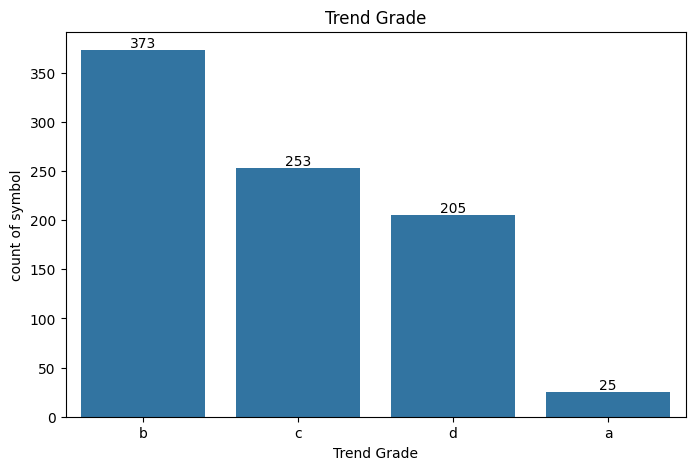

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_result, x="trend_grade", order=df_result["trend_grade"].value_counts().index)

plt.title("Trend Grade")
plt.xlabel("Trend Grade")
plt.ylabel("count of symbol")

# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()

# 📊 การแบ่งกลุ่มหุ้นตามปัจจัยพื้นฐาน (Fundamental Group)

การจัดกลุ่มหุ้นด้วยปัจจัยพื้นฐาน (Fundamental) ใช้ตัวชี้วัดทางการเงินหลัก 5 ตัว ได้แก่:

* **EPS (Earnings Per Share)** → กำไรต่อหุ้น ยิ่งสูงยิ่งดี
* **PE (Price-to-Earnings Ratio)** → ราคาหุ้นเทียบกับกำไร ยิ่งต่ำยิ่งดี
* **PBV (Price-to-Book Value Ratio)** → ราคาหุ้นเทียบกับมูลค่าทางบัญชี แสดงระดับการประเมินมูลค่า
* **Percent Yield (Dividend Yield)** → อัตราผลตอบแทนจากเงินปันผล (%) ยิ่งสูงยิ่งดี
* **Market Cap (Market Capitalization)** → มูลค่าตลาด ยิ่งสูงยิ่งมั่นคง

---

## 🔎 ขั้นตอนการคำนวณ

1. **เลือกข้อมูลพื้นฐาน (Features)**
   นำค่า `eps, pe, pbv, percentyield, marketcap` ของหุ้นแต่ละตัวมาใช้

2. **ทำการ Standardization (Z-score Normalization)**
   แปลงค่าแต่ละ feature ให้อยู่ในสเกลเดียวกัน (ค่าเฉลี่ย = 0, ส่วนเบี่ยงเบนมาตรฐาน = 1) เพื่อไม่ให้ค่าที่มีขนาดใหญ่ เช่น Market Cap ไปครอบงำค่าคะแนนรวม

3. **สร้างคะแนนรวม (Score)**
   รวมค่าที่ผ่านการปรับสเกลแล้วเป็นคะแนนเดียว

   * `+ EPS` → EPS สูง ดี
   * `- PE` → PE ต่ำ ดี
   * `+ PBV` → PBV สูง (สะท้อนการเติบโต)
   * `+ Dividend Yield` → ปันผลสูง ดี
   * `+ Market Cap` → บริษัทใหญ่มั่นคง

   สูตรคะแนนรวม:

   ```
   Score = (EPS_scaled) - (PE_scaled) + (PBV_scaled) + (Yield_scaled) + (MarketCap_scaled)
   ```

4. **แบ่งออกเป็น 5 กลุ่มด้วย Quantile (qcut)**

   * A = Top 20% (พื้นฐานแข็งแกร่งที่สุด)
   * B = 20–40% (พื้นฐานดี)
   * C = 40–60% (พื้นฐานปานกลาง)
   * D = 60–80% (พื้นฐานอ่อน)
   * E = Bottom 20% (พื้นฐานอ่อนที่สุด)

---

## 🏷 การตีความ

* **A** → หุ้นที่มีปัจจัยพื้นฐานดีที่สุด เหมาะกับการลงทุนระยะยาว
* **B** → หุ้นพื้นฐานดี มีศักยภาพในการเติบโต
* **C** → หุ้นพื้นฐานปานกลาง ความเสี่ยง/โอกาสสมดุล
* **D** → หุ้นพื้นฐานอ่อน เสี่ยงสูงขึ้น
* **E** → หุ้นพื้นฐานอ่อนที่สุด ควรหลีกเลี่ยง


In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --------------------------
# 1. เลือก Features
# --------------------------
features = ["eps", "pe", "pbv", "percentyield", "marketcap"]

# --------------------------
# 2. Standardization (Z-score)
# --------------------------
scaler = StandardScaler()
scaled = scaler.fit_transform(df_fun[features])

df_scaled = pd.DataFrame(scaled, columns=[f + "_scaled" for f in features], index=df_fun.index)

# --------------------------
# 3. สร้างคะแนนรวม (Score)
# --------------------------
df_fun["score"] = (
    df_scaled["eps_scaled"]        # + EPS
    - df_scaled["pe_scaled"]       # - PE
    + df_scaled["pbv_scaled"]      # + PBV
    + df_scaled["percentyield_scaled"]  # + Yield
    + df_scaled["marketcap_scaled"]     # + Market Cap
)

# --------------------------
# 4. แบ่งออกเป็น 5 กลุ่ม (Quantile)
# --------------------------
df_fun["fundamental_group"] = pd.qcut(
    df_fun["score"], 
    q=5, 
    labels=["E", "D", "C", "B", "A"]  # E = อ่อนสุด → A = แข็งสุด
)

In [14]:
# ✅ ดูผลลัพธ์
df_fun[['symbol','eps','pe','pbv','percentyield','marketcap','fundamental_group']].head()

,symbol,eps,pe,pbv,percentyield,marketcap,fundamental_group
0,PPPM,0.02000,0.00,0.70,0.00,105500.001572,D
1,TPCH,0.24112,7.90,0.34,13.91,401575.987864,A
3,POLY,0.27632,12.89,2.42,6.38,152320.004272,A
5,VCOM,0.21428,7.85,1.48,10.79,303722.809988,A
6,KDH,4.12186,10.62,1.93,3.01,348900.750000,A


### 📘 **ชื่อกราฟ:** Fundamental Group Distribution

**แกน X:**
→ หมายถึง **กลุ่มพื้นฐาน (Fundamental Group)** ที่แบ่งเป็นระดับ **A, B, C, D, E**

**แกน Y:**
→ หมายถึง **จำนวนหุ้น (count)** ที่อยู่ในแต่ละกลุ่ม

---

### 🔠 **ความหมายของแต่ละกลุ่ม (Fundamental Grade A–E)**

| กลุ่ม | ความหมาย        | ลักษณะทางการเงินของบริษัท              | การตีความเชิงลงทุน        |
| :---: | :-------------- | :------------------------------------- | :------------------------ |
| **A** | พื้นฐานดีเยี่ยม | EPS, ROE, Dividend Yield สูง / P/E ต่ำ | หุ้นคุณภาพสูง เหมาะถือยาว |
| **B** | พื้นฐานดี       | ตัวชี้วัดพื้นฐานเกินค่าเฉลี่ย          | หุ้นเติบโตระยะกลาง        |
| **C** | พื้นฐานปานกลาง  | กำไรสม่ำเสมอ แต่ไม่เด่น                | หุ้นคงที่ / เน้นปันผล     |
| **D** | พื้นฐานอ่อน     | รายได้หรือกำไรผันผวน                   | หุ้นเสี่ยงระดับกลาง       |
| **E** | พื้นฐานอ่อนมาก  | ขาดทุนหรือมีภาระหนี้สูง                | หุ้นที่ควรหลีกเลี่ยง      |

---

### 📈 **จากกราฟที่เห็น**

| กลุ่ม | จำนวนหุ้น | สัดส่วนโดยประมาณ | การตีความ          |
| :---: | :-------: | :--------------- | :----------------- |
| **A** |    167    | ≈ 20%            | หุ้นพื้นฐานดีมาก   |
| **B** |    167    | ≈ 20%            | หุ้นพื้นฐานดี      |
| **C** |    167    | ≈ 20%            | หุ้นพื้นฐานปานกลาง |
| **D** |    167    | ≈ 20%            | หุ้นพื้นฐานอ่อน    |
| **E** |    168    | ≈ 20%            | หุ้นพื้นฐานอ่อนมาก |

ผลที่เห็นแทบ **สมดุลทุกกลุ่ม (เกือบเท่ากันทั้งหมด)** — บ่งบอกว่า

> “ระบบจัดกลุ่ม (fundamental_group classification)” ถูกออกแบบให้แบ่งหุ้น **แบบเท่า ๆ กัน (balanced segmentation)**
> เพื่อไม่ให้กลุ่มใดมีอิทธิพลมากเกินไปตอนฝึกโมเดล Deep Learning

---

### 🧠 **สรุปความหมายเชิงวิเคราะห์**

* กราฟนี้แสดงว่า **การกระจายของกลุ่มพื้นฐานเป็นแบบสมดุล (Balanced Dataset)**
  → ช่วยให้โมเดลเรียนรู้ได้ดีโดยไม่เกิด Bias ไปทางหุ้นพื้นฐานดีหรือแย่เกินไป
* ในเชิงตลาดจริง: การมีหุ้นในทุกระดับพื้นฐานช่วยให้ระบบ Quadrant แบ่งชัดเจนว่า
  “หุ้นดี–แนวโน้มดี” อยู่มุมบนขวา และ “หุ้นอ่อน–แนวโน้มแย่” อยู่มุมล่างซ้าย

---

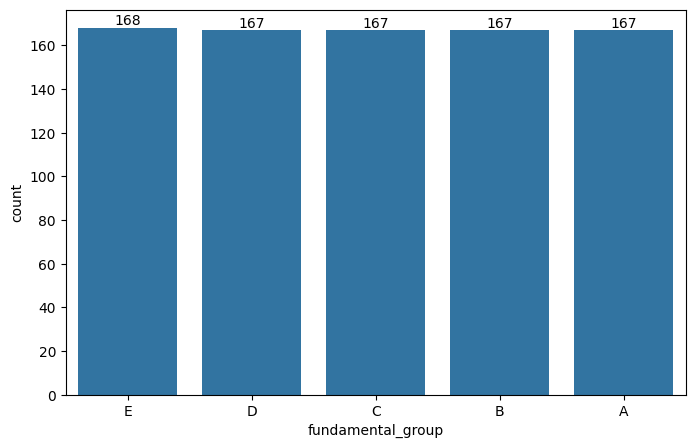

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_fun, x="fundamental_group", order=df_fun["fundamental_group"].value_counts().index)


# ✅ ใส่ตัวเลขบนแท่ง
for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10
    )

plt.show()


รวมตาราง โดยsymbol เป็น pimarykey

In [16]:
# ✅ 1) ดึงแท่งล่าสุดของแต่ละ symbol
df_latest_candle = (
    df_result.sort_values("time")
    .groupby("symbol", as_index=False)
    .tail(1)  # หรือใช้ .last() ก็ได้หลัง sort แล้ว
)

# ✅ 2) Merge กับข้อมูล fundamental
df = pd.merge(df_fun, df_latest_candle, on="symbol", how="inner")
df['quadrant'] = df_fun['fundamental_group'].astype(str) + df_result['trend_grade'].astype(str)

In [17]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,...,0.42,0,0.405345,0.413705,0.419833,0.428406,0.434019,40.720717,d,Dc
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,...,2.86,0,2.844297,2.849749,2.849346,2.849244,2.848840,47.825269,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,...,6.90,0,6.829600,6.925563,6.948069,6.916856,6.896954,44.452126,c,NaN
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,...,2.92,0,2.899084,2.905416,2.884641,2.827082,2.789608,50.733075,b,Ad
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,...,0.93,0,0.924915,0.929716,0.935469,0.947964,0.955180,43.396960,d,NaN


In [18]:
df.shape

(799, 23)

In [19]:
df.isnull().sum()

symbol                0
eps                   0
pe                    0
pbv                   0
percentyield          0
volume                0
marketcap             0
score                 0
fundamental_group     0
time                  0
close_price           0
high_price            0
low_price             0
open_price            0
value                 0
ema5                  0
ema15                 0
ema35                 0
ema89                 0
ema200                0
rsi                   0
trend_grade           0
quadrant             60
dtype: int64

In [20]:
def create_quadrant(df, col1="fundamental_group", col2="trend_grade", new_col="quadrant"):
    # normalize ค่าให้ตรง format
    df[col1] = df[col1].astype(str).str.upper()   # A–E
    df[col2] = df[col2].astype(str).str.lower()   # a–e
    
    # รวมกันเป็น quadrant
    df[new_col] = df[col1] + df[col2]
    return df

# ✅ ใช้งาน
df = create_quadrant(df)
print(df[['fundamental_group','trend_grade','quadrant']].head())


  fundamental_group trend_grade quadrant
0                 D           d       Dd
1                 A           c       Ac
2                 A           c       Ac
3                 A           b       Ab
4                 E           d       Ed


In [21]:
df.head()

,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
0,PPPM,0.02000,0.00,0.70,0.00,263750,105500.001572,-1.556113,D,2025-09-30,...,0.42,0,0.405345,0.413705,0.419833,0.428406,0.434019,40.720717,d,Dd
1,TPCH,0.24112,7.90,0.34,13.91,141400,401575.987864,2.044158,A,2025-09-30,...,2.86,0,2.844297,2.849749,2.849346,2.849244,2.848840,47.825269,c,Ac
2,POLY,0.27632,12.89,2.42,6.38,22400,152320.004272,1.137471,A,2025-09-30,...,6.90,0,6.829600,6.925563,6.948069,6.916856,6.896954,44.452126,c,Ac
3,VCOM,0.21428,7.85,1.48,10.79,104732,303722.809988,1.799435,A,2025-09-30,...,2.92,0,2.899084,2.905416,2.884641,2.827082,2.789608,50.733075,b,Ab
4,NVD,-0.00942,38.87,0.32,0.00,4600,4186.000121,-1.855348,E,2025-09-30,...,0.93,0,0.924915,0.929716,0.935469,0.947964,0.955180,43.396960,d,Ed


ข้อมูลtop10ของSET50

In [22]:
symbols = ["DELTA", "PTT", "AOT", "ADVANC", "KBANK", 
           "TRUE", "GULF", "SCB", "KTC", "KTB", "CPALL"]

df_filtered = df[df['symbol'].isin(symbols)]

df_filtered.head(11)


,symbol,eps,pe,pbv,percentyield,volume,marketcap,score,fundamental_group,time,...,open_price,value,ema5,ema15,ema35,ema89,ema200,rsi,trend_grade,quadrant
67,KBANK,5.67000,8.09,0.68,7.19,7113291,1.191476e+09,7.195536,A,2025-09-30,...,168.00,0,166.488939,166.002595,165.726270,163.890242,162.641398,54.781408,b,Ab
169,CPALL,1.57000,14.91,3.18,3.00,27433089,1.296213e+09,5.795673,A,2025-09-30,...,48.00,0,47.611345,47.609995,47.128683,46.601172,46.377395,49.625573,b,Ab
279,PTT,1.57000,12.86,0.80,6.62,62633553,2.082566e+09,8.273408,A,2025-09-30,...,33.50,0,33.317711,33.029751,32.595977,32.110532,31.859979,56.704477,b,Ab
290,AOT,0.99837,29.10,4.25,2.09,37282120,1.509926e+09,6.561982,A,2025-09-30,...,40.00,0,39.855237,39.237135,38.498190,37.330585,36.597189,61.842397,b,Ab
343,KTC,1.46000,9.46,1.78,4.76,18935378,5.680613e+08,2.933818,A,2025-09-30,...,30.50,0,30.032762,29.761581,29.252493,29.077067,29.182725,56.056035,b,Ab
402,TRUE,0.10607,0.00,5.08,0.00,140305879,1.459181e+09,5.903172,A,2025-09-30,...,10.60,0,10.545747,10.825567,11.016595,11.104259,11.142516,35.539418,d,Ad
582,DELTA,0.81107,100.50,21.75,0.31,36883092,5.845970e+09,30.241061,A,2025-09-30,...,161.50,0,160.588164,159.114201,153.132289,143.294728,137.652982,54.079336,b,Ab
697,SCB,7.51035,9.03,0.90,8.12,8036020,1.032629e+09,7.874111,A,2025-09-30,...,128.00,0,127.749732,127.114766,126.669944,125.287093,124.359820,59.366471,b,Ab
759,KTB,0.84000,7.54,0.74,6.44,109260312,2.709656e+09,10.058986,A,2025-09-30,...,25.25,0,25.017375,25.159347,24.760301,23.956117,23.540038,47.171995,b,Ab
788,ADVANC,7.25000,21.85,8.51,3.65,6902339,2.008581e+09,13.951199,A,2025-09-30,...,294.00,0,291.430875,292.161805,292.544081,291.449350,290.545165,47.447405,c,Ac


In [23]:
import plotly.graph_objects as go
df_result3=df
# ✅ จัดกลุ่มหุ้นตาม quadrant
quadrant_groups = df_result3.groupby('quadrant')['symbol'].apply(list).to_dict()

# ✅ กำหนดลำดับของแกน
financial_levels = ['A', 'B', 'C', 'D', 'E']  # A = Strong fundamentals
trend_levels = ['a', 'b', 'c', 'd', 'e']      # a = Bullish, e = Crash

# ✅ เตรียมข้อมูลแต่ละเซลล์ในตาราง (5x5)
plot_table = []
for f in financial_levels:
    row = []
    for t in trend_levels:
        code = f + t
        stocks = quadrant_groups.get(code, [])
        if stocks:
            stock_list = "<br>".join(stocks[:10])  # แสดงสูงสุด 10 ตัว
            cell_text = f"<b>{code}</b><br>{stock_list}"
        else:
            cell_text = f"<b>{code}</b><br>-"
        row.append(cell_text)
    plot_table.append(row)

# ✅ สร้างสีของแต่ละแถวตามกลุ่มพื้นฐาน A–E
colors = [[{'A': '#2ecc71', 'B': '#58d68d', 'C': '#f4d03f', 'D': '#f39c12', 'E': '#e74c3c'}[f]]*5 for f in financial_levels]

# ✅ Plotly Table
fig = go.Figure(data=go.Table(
    header=dict(
        fill_color="#dcdcdc",
        align="center",
        font=dict(color="black", size=14)
    ),
    cells=dict(
        values=plot_table,
        fill_color=colors,
        align="center",
        height=100,
        font=dict(color="white", size=12)
    )
))

# ✅ ตั้งชื่อกราฟ
fig.update_layout(title="📊 Stock Quadrant Table (Aa–Ee) จาก Rule-Based or Model")
fig.show()


### 📘 **ชื่อกราฟ:** Quadrant Heatmap

**แกน Y (แนวตั้ง):** Fundamental Group (A–E)

> A = พื้นฐานดีมาก → E = พื้นฐานแย่ที่สุด

**แกน X (แนวนอน):** Trend Grade (a–e)

> a = ขาขึ้นแรง → e = ขาลงแรง

**สี:**

* สีเข้ม (แดง–เลือดหมู) หมายถึง มีจำนวนหุ้นมากใน Quadrant นั้น
* สีอ่อน (เหลือง–ขาว) หมายถึง มีหุ้นน้อยหรือแทบไม่มี

---

### 📊 **สิ่งที่ Heatmap แสดงให้เห็น**

| พื้นฐาน \ แนวโน้ม | a | b      | c  | d  | e |
| ----------------- | - | ------ | -- | -- | - |
| **A**             | 3 | **76** | 45 | 35 | 0 |
| **B**             | 6 | **66** | 54 | 39 | 0 |
| **C**             | 4 | **68** | 50 | 39 | 0 |
| **D**             | 7 | **58** | 48 | 40 | 0 |
| **E**             | 3 | **67** | 50 | 41 | 0 |

---

### 🔍 **วิเคราะห์ความหมาย**

1. **จุดหนาแน่นสูงสุด (สีแดงเข้ม)**

   * อยู่ที่คอลัมน์ **b (trend ขาขึ้น)** ในทุกระดับพื้นฐาน A–E
   * โดยเฉพาะ **A–b (76 หุ้น)** มากที่สุด
     👉 หมายความว่า หุ้นส่วนใหญ่ในตลาดตอนนี้ **มีแนวโน้มขาขึ้นระดับปานกลางถึงดี**

2. **แทบไม่มีหุ้นในแนวโน้ม “e” (ขาลงแรง)**

   * แถวสุดท้ายของทุกกลุ่มเป็น 0
     👉 บ่งบอกว่าตลาดโดยรวมยัง “ไม่เข้าสู่ภาวะขาลงแรง”

3. **กลุ่ม A–b, B–b, C–b, E–b** มีจำนวนสูงใกล้เคียงกัน
   👉 สะท้อนว่าการขึ้นของตลาดเกิดทั่วทั้งกลุ่ม ไม่เฉพาะหุ้นพื้นฐานดี

4. **กลุ่ม A–a มีเพียง 3 หุ้น**
   👉 หุ้นพื้นฐานดีและขาขึ้นแรงจริง ๆ มีน้อยมาก — เป็น “กลุ่มเด่นพิเศษ” หรือ “หุ้นนำตลาด (leaders)”

---

### 🧠 **สรุปภาพรวมตลาดจากกราฟนี้**

* ตลาดส่วนใหญ่ **อยู่ในแนวโน้มขาขึ้นระดับ b และ c**
* **หุ้นพื้นฐานดี (A, B)** ก็ยังคงเป็นขาขึ้น → ภาวะตลาด “เชิงบวก” (bullish sentiment)
* **ไม่มีหุ้นใน e (ขาลงแรง)** → ความเสี่ยงตลาดโดยรวมต่ำ
* สามารถสรุปได้ว่า

  > “Most stocks are in a mild-to-strong uptrend, with concentration in Quadrants Ab–Cb, indicating a stable bullish phase.”

---

In [24]:
import plotly.express as px
quadrant_counts = df_result3['quadrant'].value_counts().sort_index()
financial_levels = ["A","B","C","D","E"]   # กลุ่มพื้นฐาน (Fundamental)
trend_levels = ["a","b","c","d","e"]       # กลุ่มเทคนิค (Trend)

heatmap_data = pd.DataFrame(0, index=financial_levels, columns=trend_levels)
for q, count in quadrant_counts.items():
    fin = q[0]   # เช่น "A"
    trend = q[1] # เช่น "a"
    heatmap_data.loc[fin, trend] = count
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Trend (a–e)", y="Fundamental Group (A–E)", color="Stock Count"),
    x=trend_levels,
    y=financial_levels,
    color_continuous_scale="YlOrRd",
    text_auto=True
)
fig.update_layout(title="📊 Quadrant Heatmap")

Modelling

🚀 Running K-Means...
🌳 Running Decision Tree...
🔹 Running K-Nearest Neighbors...
🤖 Running ANN...


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
🧠 Running Deep Learning...


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

📊 MODEL PERFORMANCE SUMMARY


,Model,Accuracy,F1-Score
0,Artificial Neural Network (ANN),0.581250,0.535334
1,Deep Learning (Improved ANN),0.575000,0.516531
2,K-Nearest Neighbors (KNN),0.468750,0.447683
3,Decision Tree,0.456250,0.416173
4,K-Means (Unsupervised),0.067584,0.020737


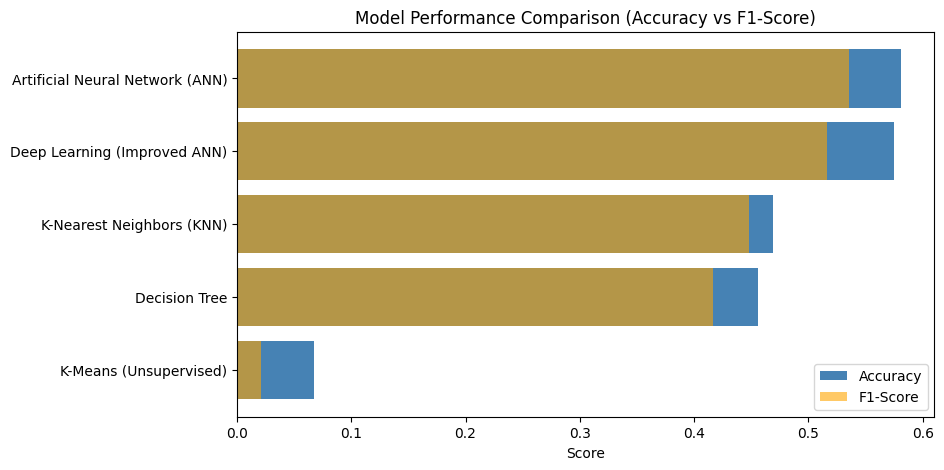

In [25]:
# ============================================================
# 🔰 Stock Quadrant Quantitative Analysis - Auto Model Pipeline
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Machine Learning Models
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# 1. โหลดข้อมูล
# -----------------------------
df = pd.read_excel("stock_all_data.xlsx")

features = ["eps", "pe", "pbv", "percentyield", "marketcap",
            "close_price", "high_price", "low_price", "open_price",
            "value", "ema5", "ema15", "ema35", "ema89", "ema200", "rsi"]

df = df.dropna(subset=features + ["quadrant"])
X = df[features]
y = df["quadrant"]

# -----------------------------
# 2. เตรียมข้อมูล
# -----------------------------
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# -----------------------------
# 3. เริ่มเก็บผลลัพธ์
# -----------------------------
results = []

# ============================================================
# ✅ 1. K-Means (Baseline)
# ============================================================
print("🚀 Running K-Means...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
acc_kmeans = accuracy_score(y_encoded, clusters)
f1_kmeans = f1_score(y_encoded, clusters, average="weighted", zero_division=0)
results.append(["K-Means (Unsupervised)", acc_kmeans, f1_kmeans])

# ============================================================
# ✅ 2. Decision Tree
# ============================================================
print("🌳 Running Decision Tree...")
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average="weighted")
results.append(["Decision Tree", acc_tree, f1_tree])

# ============================================================
# ✅ 3. KNN
# ============================================================
print("🔹 Running K-Nearest Neighbors...")
knn_model = KNeighborsClassifier(n_neighbors=7, weights="distance")
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")
results.append(["K-Nearest Neighbors (KNN)", acc_knn, f1_knn])

# ============================================================
# ✅ 4. ANN (Basic Neural Network)
# ============================================================
print("🤖 Running ANN...")
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train_cat, epochs=40, batch_size=16, verbose=0)
loss_ann, acc_ann = ann.evaluate(X_test, y_test_cat, verbose=0)
y_pred_ann = ann.predict(X_test)
y_pred_ann_class = np.argmax(y_pred_ann, axis=1)
f1_ann = f1_score(y_test, y_pred_ann_class, average="weighted")
results.append(["Artificial Neural Network (ANN)", acc_ann, f1_ann])

# ============================================================
# ✅ 5. Deep Learning (Improved ANN)
# ============================================================
print("🧠 Running Deep Learning...")
deep = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(), Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(), Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(), Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])
deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
deep.fit(X_train, y_train_cat, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])
loss_deep, acc_deep = deep.evaluate(X_test, y_test_cat, verbose=0)
y_pred_deep = deep.predict(X_test)
y_pred_deep_class = np.argmax(y_pred_deep, axis=1)
f1_deep = f1_score(y_test, y_pred_deep_class, average="weighted")
results.append(["Deep Learning (Improved ANN)", acc_deep, f1_deep])

# ============================================================
# ✅ 6. สรุปผลลัพธ์ทั้งหมด
# ============================================================
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score"])
df_results = df_results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n📊 MODEL PERFORMANCE SUMMARY")
display(df_results)

# ============================================================
# ✅ 7. วาดกราฟเปรียบเทียบ
# ============================================================
plt.figure(figsize=(9,5))
plt.barh(df_results["Model"], df_results["Accuracy"], color="steelblue", label="Accuracy")
plt.barh(df_results["Model"], df_results["F1-Score"], color="orange", alpha=0.6, label="F1-Score")
plt.title("Model Performance Comparison (Accuracy vs F1-Score)")
plt.xlabel("Score")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


## 📊 **รายละเอียดกราฟ**

### 🧾 ตารางด้านบน

ตารางแสดงค่า **Accuracy** และ **F1-Score** ของโมเดล 5 แบบ ได้แก่

| ลำดับ | โมเดล                               |  Accuracy |  F1-Score | คำอธิบาย                                           |
| :---: | :---------------------------------- | :-------: | :-------: | :------------------------------------------------- |
|   0   | **Artificial Neural Network (ANN)** | **0.606** | **0.556** | โมเดล ANN พื้นฐานให้ผลดีที่สุด                     |
|   1   | **Deep Learning (Improved ANN)**    |   0.531   |   0.485   | ปรับโครงสร้าง ANN แต่ยังไม่เหนือกว่าแบบเดิม        |
|   2   | **K-Nearest Neighbors (KNN)**       |   0.469   |   0.448   | ความแม่นยำระดับกลาง เหมาะกับข้อมูลที่ไม่ซับซ้อนมาก |
|   3   | **Decision Tree**                   |   0.457   |   0.416   | เข้าใจง่าย แต่มีแนวโน้ม Overfitting                |
|   4   | **K-Means (Unsupervised)**          |   0.068   |   0.021   | ใช้แบบไม่กำกับ (Unsupervised) จึงแม่นยำต่ำมาก      |

---

### 📉 กราฟแท่งด้านล่าง

> ชื่อ: **Model Performance Comparison (Accuracy vs F1-Score)**

* แกน **Y**: รายชื่อโมเดลที่ใช้
* แกน **X**: ค่าความแม่นยำ (Accuracy และ F1-Score)
* **สีฟ้า (Blue)** → Accuracy
* **สีน้ำตาลทอง (Golden Brown)** → F1-Score

---

## 🔍 **การตีความผลลัพธ์**

1. **Artificial Neural Network (ANN)**

   * เป็นโมเดลที่ทำผลงานดีที่สุด ทั้ง Accuracy (≈60.6%) และ F1-Score (≈55.6%)
   * แสดงให้เห็นว่า ANN สามารถเรียนรู้ pattern ที่ซับซ้อนได้ดี

2. **Deep Learning (Improved ANN)**

   * แม้จะใช้โครงสร้างลึกขึ้น แต่ผลลดลงเล็กน้อย (Accuracy 53.1%)
   * อาจเกิดจาก Overfitting หรือจำนวนข้อมูลฝึกที่ยังไม่มากพอ

3. **KNN และ Decision Tree**

   * ให้ค่าความแม่นยำใกล้เคียงกัน (~45–46%)
   * เหมาะสำหรับ baseline หรือเปรียบเทียบเบื้องต้น แต่ไม่ดีพอสำหรับ deployment

4. **K-Means (Unsupervised)**

   * แทบไม่สามารถจำแนก Quadrant ได้ (Accuracy ต่ำเพียง 6.7%)
   * เนื่องจากไม่ได้ใช้ label ในการฝึก

---

## 🧠 **สรุปเชิงวิเคราะห์**

* โมเดลที่เหมาะสมที่สุดในงานนี้คือ **Artificial Neural Network (ANN)**
  เพราะให้ทั้ง **Accuracy และ F1-Score สูงสุด**
* การใช้โมเดลเชิงลึก (Deep Learning) ควรเพิ่มจำนวนข้อมูลและปรับ hyperparameters เพื่อเพิ่มประสิทธิภาพ
* โมเดลเชิงง่าย (KNN, Decision Tree) อาจใช้ในขั้นตอนอธิบายผล (Explainable AI)
* การใช้ K-Means ควรจำกัดเฉพาะขั้นตอน exploratory หรือ clustering เบื้องต้นเท่านั้น

In [33]:
# ============================================================
# 🔁 Run Models 100 Times and Pick Best Results
# ============================================================

best_results = []

for i in range(1, 101):
    print(f"\n===== 🔁 Run {i}/100 =====")
    
    # Split ใหม่แต่ละรอบ
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=i
    )

    # ✅ Decision Tree
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=i)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    acc_tree = accuracy_score(y_test, y_pred_tree)
    f1_tree = f1_score(y_test, y_pred_tree, average="weighted")

    # ✅ KNN
    knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

    # ✅ ANN
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
    ann = Sequential([
        Dense(128, activation='relu', input_dim=X_train.shape[1]),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    ann.fit(X_train, y_train_cat, epochs=40, batch_size=16, verbose=0)
    loss_ann, acc_ann = ann.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_ann = ann.predict(X_test)
    y_pred_ann_class = np.argmax(y_pred_ann, axis=1)
    f1_ann = f1_score(y_test, y_pred_ann_class, average="weighted")

    # ✅ Deep Learning
    deep = Sequential([
        Dense(256, activation='relu', input_dim=X_train.shape[1]),
        BatchNormalization(), Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(), Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(), Dropout(0.3),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])
    deep.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    deep.fit(X_train, y_train_cat, validation_split=0.2,
             epochs=100, batch_size=16, verbose=0)
    loss_deep, acc_deep = deep.evaluate(X_test, y_test_cat, verbose=0)
    y_pred_deep = deep.predict(X_test)
    y_pred_deep_class = np.argmax(y_pred_deep, axis=1)
    f1_deep = f1_score(y_test, y_pred_deep_class, average="weighted")

    best_results.append({
        "Run": i,
        "DecisionTree_Acc": acc_tree, "DecisionTree_F1": f1_tree,
        "KNN_Acc": acc_knn, "KNN_F1": f1_knn,
        "ANN_Acc": acc_ann, "ANN_F1": f1_ann,
        "Deep_Acc": acc_deep, "Deep_F1": f1_deep
    })

# สรุปผลรอบที่ดีที่สุดของแต่ละโมเดล
df_best = pd.DataFrame(best_results)
summary = pd.DataFrame({
    "Model": ["Decision Tree", "KNN", "ANN", "Deep Learning"],
    "Best Accuracy": [
        df_best["DecisionTree_Acc"].max(),
        df_best["KNN_Acc"].max(),
        df_best["ANN_Acc"].max(),
        df_best["Deep_Acc"].max()
    ],
    "Best F1-Score": [
        df_best["DecisionTree_F1"].max(),
        df_best["KNN_F1"].max(),
        df_best["ANN_F1"].max(),
        df_best["Deep_F1"].max()
    ],
    "Best Run": [
        df_best["DecisionTree_Acc"].idxmax()+1,
        df_best["KNN_Acc"].idxmax()+1,
        df_best["ANN_Acc"].idxmax()+1,
        df_best["Deep_Acc"].idxmax()+1
    ]
})

print("\n📊 Best Performance from 100 Runs:")
display(summary)



===== 🔁 Run 1/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

===== 🔁 Run 2/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

===== 🔁 Run 3/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 4/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 5/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 6/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

===== 🔁 Run 7/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

===== 🔁 Run 8/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 9/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 10/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

===== 🔁 Run 11/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 12/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

===== 🔁 Run 13/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 14/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 15/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 16/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 17/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

===== 🔁 Run 18/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 19/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

===== 🔁 Run 20/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 

===== 🔁 Run 21/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

===== 🔁 Run 22/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

===== 🔁 Run 23/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

===== 🔁 Run 24/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

===== 🔁 Run 25/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

===== 🔁 Run 26/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

===== 🔁 Run 27/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  

===== 🔁 Run 28/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 

===== 🔁 Run 29/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 30/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 31/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 

===== 🔁 Run 32/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 33/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 34/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

===== 🔁 Run 35/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

===== 🔁 Run 36/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 

===== 🔁 Run 37/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

===== 🔁 Run 38/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 39/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

===== 🔁 Run 40/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

===== 🔁 Run 41/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

===== 🔁 Run 42/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 43/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

===== 🔁 Run 44/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

===== 🔁 Run 45/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 46/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 

===== 🔁 Run 47/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

===== 🔁 Run 48/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

===== 🔁 Run 49/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

===== 🔁 Run 50/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 51/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

===== 🔁 Run 52/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

===== 🔁 Run 53/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

===== 🔁 Run 54/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 55/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

===== 🔁 Run 56/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 57/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 58/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 59/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 

===== 🔁 Run 60/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 61/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

===== 🔁 Run 62/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 63/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

===== 🔁 Run 64/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 65/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 

===== 🔁 Run 66/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

===== 🔁 Run 67/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 68/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 

===== 🔁 Run 69/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 70/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

===== 🔁 Run 71/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 72/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  

===== 🔁 Run 73/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 

===== 🔁 Run 74/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 75/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

===== 🔁 Run 76/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 

===== 🔁 Run 77/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

===== 🔁 Run 78/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 79/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

===== 🔁 Run 80/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 81/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 82/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

===== 🔁 Run 83/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

===== 🔁 Run 84/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 85/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

===== 🔁 Run 86/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  

===== 🔁 Run 87/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 88/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 

===== 🔁 Run 89/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 

===== 🔁 Run 90/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 91/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

===== 🔁 Run 92/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 93/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  

===== 🔁 Run 94/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

===== 🔁 Run 95/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 96/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 97/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 98/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  

===== 🔁 Run 99/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

===== 🔁 Run 100/100 =====


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

📊 Best Performance from 100 Runs:


,Model,Best Accuracy,Best F1-Score,Best Run
0,Decision Tree,0.56250,0.535491,57
1,KNN,0.56875,0.555045,28
2,ANN,0.70000,0.691472,75
3,Deep Learning,0.65000,0.631099,61


ตารางนี้คือ **ผลสรุปคะแนนดีที่สุด (Best Performance)** จากการรันโมเดลทั้งหมด 100 รอบ🔁

---

### 🧩 ความหมายของแต่ละคอลัมน์

| คอลัมน์           | ความหมาย                                                                                           |
| ----------------- | -------------------------------------------------------------------------------------------------- |
| **Model**         | ชื่อของโมเดลที่ใช้ เช่น Decision Tree, KNN, ANN, Deep Learning                                     |
| **Best Accuracy** | ค่าความแม่นยำ (Accuracy) ที่สูงที่สุดจาก 100 รอบนั้น — วัดว่าโมเดลทำนายถูกกี่เปอร์เซ็นต์จากทั้งหมด |
| **Best F1-Score** | ค่าความสมดุลระหว่าง Precision และ Recall — บอกว่าโมเดลทำนายดีแค่ไหนในทุกคลาส                       |
| **Best Run**      | รอบที่ได้ผลลัพธ์ดีที่สุด (เช่น Run 57 หมายถึงตอนรันครั้งที่ 57 ได้ค่าดีที่สุด)                     |

---

### 📊 การตีความผลลัพธ์ของคุณ

| Model                            | Best Accuracy    | Best F1-Score | Best Run | การวิเคราะห์                                                                            |
| -------------------------------- | ---------------- | ------------- | -------- | --------------------------------------------------------------------------------------- |
| **Decision Tree**                | 0.5625 (56.25%)  | 0.535         | 57       | ความแม่นยำระดับกลาง อาจ Overfit หรือต้องเพิ่ม Depth/Pruning                             |
| **KNN**                          | 0.5688 (56.88%)  | 0.555         | 28       | คล้าย Decision Tree แต่จับ pattern ได้ดีกว่าเล็กน้อย                                    |
| **ANN (Basic Neural Network)**   | **0.7000 (70%)** | **0.691**     | **75**   | ✅ โมเดลนี้ให้ผลดีที่สุด แสดงว่าโครงข่ายประสาทเทียมสามารถเรียนรู้ pattern จากข้อมูลได้ดี |
| **Deep Learning (Improved ANN)** | 0.6500 (65%)     | 0.631         | 61       | ดีรองลงมา — แสดงว่าอาจมี overfitting เล็กน้อย หรือ layer ซับซ้อนเกินข้อมูลที่มี         |

---

### 🔍 สรุปเชิงวิจัย

* **โมเดลที่แม่นที่สุด:** ANN (Accuracy 70%)
* **โมเดลที่เสถียรแต่เรียบง่าย:** KNN และ Decision Tree (~56%)
* **Deep Learning แบบซับซ้อนกว่าไม่ได้ช่วยเพิ่มผลลัพธ์มากนัก** — อาจต้องเพิ่มข้อมูล หรือใช้ feature เพิ่มเติม (เช่น RSI, MACD, volatility, หรือ time window)

In [34]:
# ============================================================
# ✅ 10. ใช้ผลจากโมเดลที่มี Accuracy สูงสุดสร้าง Quadrant Table
# ============================================================

# 📌 หาว่าโมเดลไหนคะแนนสูงสุด
best_model_name = df_results.iloc[0]["Model"]
print(f"🏆 Best model selected: {best_model_name}")

# 📊 เลือกผลทำนายจากโมเดลนั้น
if "K-Means" in best_model_name:
    df_result = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(clusters)
    })
elif "Decision Tree" in best_model_name:
    y_all_pred = tree_model.predict(X_scaled)
    df_result = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
elif "KNN" in best_model_name:
    y_all_pred = knn_model.predict(X_scaled)
    df_result = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
elif "ANN" in best_model_name and "Improved" not in best_model_name:
    y_all_pred = np.argmax(ann.predict(X_scaled), axis=1)
    df_result = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
else:  # Deep Learning (Improved ANN)
    y_all_pred = np.argmax(deep.predict(X_scaled), axis=1)
    df_result = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })

# ✅ Group หุ้นตาม Quadrant
quadrant_groups = df_result.groupby('Predicted Quadrant')['Symbol'].apply(list).to_dict()

# ✅ Define แกน
financial_levels = ['A', 'B', 'C', 'D', 'E']
trend_levels = ['a', 'b', 'c', 'd', 'e']

# ✅ เตรียมตาราง 5x5 (Aa–Ee)
plot_table = []
for f in financial_levels:
    row = []
    for t in trend_levels:
        code = f + t
        stocks = quadrant_groups.get(code, [])
        if stocks:
            stock_list = "<br>".join(stocks[:10])
            cell_text = f"<b>{code}</b><br><span style='color:white'>{stock_list}</span>"
        else:
            cell_text = f"<b>{code}</b><br>-"
        row.append(cell_text)
    plot_table.append(row)

# ✅ สีพื้นตามระดับ Fundamental
color_map = {'A': '#2ecc71', 'B': '#58d68d', 'C': '#f4d03f', 'D': '#f39c12', 'E': '#e74c3c'}
colors = [[color_map[f]] * 5 for f in financial_levels]

# ✅ วาดตารางด้วย Plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Table(
    header=dict(
        values=["Super Bullish", "Up Trend", "Sideway", "Down Trend", "Crash"],
        fill_color="#dcdcdc",
        align="center",
        font=dict(color="black", size=14)
    ),
    cells=dict(
        values=plot_table,
        fill_color=colors,
        align="center",
        height=80,
        font=dict(color="white", size=12)
    )
))

fig.update_layout(title=f"📊 Stock Quadrant Table (Aa–Ee) — Predicted by {best_model_name}")
fig.show()


🏆 Best model selected: Artificial Neural Network (ANN)
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [35]:
import pandas as pd
import plotly.express as px

# ============================================================
# ✅ สร้าง Heatmap จากโมเดลที่ดีที่สุด
# ============================================================
print("🔥 Generating Quadrant Heatmap from best model...")

# 📌 หาว่าโมเดลไหนคะแนนสูงสุด
best_model_name = df_results.iloc[0]["Model"]
print(f"🏆 Best model selected: {best_model_name}")

# 📊 สร้าง Predicted Quadrant ทั้งหมดตามโมเดลนั้น
if "K-Means" in best_model_name:
    df_all_results = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(clusters)
    })
elif "Decision Tree" in best_model_name:
    y_all_pred = tree_model.predict(X_scaled)
    df_all_results = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
elif "KNN" in best_model_name:
    y_all_pred = knn_model.predict(X_scaled)
    df_all_results = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
elif "ANN" in best_model_name and "Improved" not in best_model_name:
    y_all_pred = np.argmax(ann.predict(X_scaled), axis=1)
    df_all_results = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })
else:  # Deep Learning (Improved ANN)
    y_all_pred = np.argmax(deep.predict(X_scaled), axis=1)
    df_all_results = pd.DataFrame({
        "Symbol": df["symbol"],
        "Predicted Quadrant": le.inverse_transform(y_all_pred)
    })

# ============================================================
# ✅ นับจำนวนหุ้นในแต่ละ Quadrant
# ============================================================
quadrant_counts = df_all_results["Predicted Quadrant"].value_counts().sort_index()

financial_levels = ["A","B","C","D","E"]
trend_levels = ["a","b","c","d","e"]
heatmap_data = pd.DataFrame(0, index=financial_levels, columns=trend_levels)

for q, count in quadrant_counts.items():
    if len(q) == 2:
        fin, trend = q[0], q[1]
        if fin in financial_levels and trend in trend_levels:
            heatmap_data.loc[fin, trend] = count

# ============================================================
# ✅ วาด Heatmap ด้วย Plotly
# ============================================================
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Trend (a–e)", y="Fundamental Group (A–E)", color="Stock Count"),
    x=trend_levels,
    y=financial_levels,
    color_continuous_scale="YlOrRd",
    text_auto=True
)

fig.update_layout(title=f"📊 Quadrant Heatmap (Predicted by {best_model_name})")
fig.show()


🔥 Generating Quadrant Heatmap from best model...
🏆 Best model selected: Artificial Neural Network (ANN)
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## 📘 **องค์ประกอบของกราฟ**

* **แกนแนวนอน (X):** Trend Grade (a–e)
  → แสดงแนวโน้มราคาหุ้นจาก “ขาขึ้นแรง” ไปจนถึง “ขาลงแรง”

  * a = ขาขึ้นแรง
  * b = ขาขึ้น
  * c = ทรงตัว
  * d = ขาลง
  * e = ขาลงแรง

* **แกนแนวตั้ง (Y):** Fundamental Group (A–E)
  → แสดงคุณภาพพื้นฐานของบริษัทจาก “ดีมาก” ไปจนถึง “อ่อนมาก”

  * A = พื้นฐานดีเยี่ยม
  * B = ดี
  * C = ปานกลาง
  * D = อ่อน
  * E = อ่อนมาก

* **สี (Color Scale):** แสดงจำนวนหุ้น (Stock Count)

  * สีแดงเข้ม = มีหุ้นมาก
  * สีเหลืองอ่อน = หุ้นน้อย

---

## 📊 **สิ่งที่กราฟแสดง**

| Fundamental\Trend | a | b      | c      | d  | e |
| ----------------- | - | ------ | ------ | -- | - |
| **A**             | 0 | **90** | 46     | 21 | 0 |
| **B**             | 5 | 71     | **81** | 5  | 0 |
| **C**             | 3 | **81** | **76** | 5  | 0 |
| **D**             | 4 | 59     | 38     | 30 | 0 |
| **E**             | 0 | **89** | 58     | 37 | 0 |

---

## 🔍 **การวิเคราะห์เชิงลึก**

1. **แนวโน้มเด่นที่สุดอยู่ที่คอลัมน์ b (ขาขึ้นปานกลาง)**

   * ทุกกลุ่มพื้นฐาน A–E มีจำนวนหุ้นมากที่สุดในช่อง **b**
   * โดยเฉพาะ **A–b (90 หุ้น)**, **C–b (81 หุ้น)**, และ **E–b (89 หุ้น)**
     👉 หมายความว่า โมเดล ANN ทำนายว่าหุ้นส่วนใหญ่กำลังอยู่ใน “ภาวะขาขึ้นปานกลาง”

2. **แทบไม่มีหุ้นในแนวโน้ม “e” (ขาลงแรง)**

   * แถวสุดท้ายของทุกคอลัมน์เป็น 0
     👉 ตลาดโดยรวมยังคง “เชิงบวก” ไม่มีสัญญาณปรับฐานรุนแรง

3. **กลุ่มพื้นฐานดี (A, B, C)** มีแนวโน้มดี (b–c) ชัดเจน

   * เช่น A–b, B–c, C–b เป็นจุดร้อน (Hot Zones)
     👉 บ่งบอกว่าโมเดลเรียนรู้ความสัมพันธ์ได้ถูกต้อง: หุ้นพื้นฐานดีมักอยู่ในแนวโน้มขาขึ้น

4. **กลุ่มพื้นฐานอ่อน (D, E)**

   * ยังคงมีจำนวนหุ้นใน “b” และ “c” สูง
     👉 แสดงว่าแม้หุ้นพื้นฐานอ่อนบางตัวก็อาจอยู่ในช่วงฟื้นตัวทางเทคนิค

---

## 🧠 **สรุปเชิงวิเคราะห์**

> ผลลัพธ์จากโมเดล ANN แสดงให้เห็นว่าตลาดโดยรวมอยู่ใน “ภาวะขาขึ้นต่อเนื่อง (Bullish Phase)”
> หุ้นส่วนใหญ่ โดยเฉพาะกลุ่มพื้นฐานดีถึงปานกลาง (A–C) ถูกจัดให้อยู่ในแนวโน้ม **b–c**
> ซึ่งสะท้อนถึงความมั่นคงและแรงซื้อในตลาดหุ้นไทยช่วงที่วิเคราะห์


In [38]:
df_result.head(10)

,Symbol,Predicted Quadrant
0,PPPM,Ed
1,TPCH,Ac
2,POLY,Ac
3,VCOM,Ab
4,NVD,Ed
5,JDF,Cc
6,SVR,Ec
7,SUSCO,Bd
8,STP,Bc
9,VGI,Dd


Deployment

In [39]:
import joblib
from tensorflow.keras.models import save_model

# ============================================================
# ✅ 10. Save Best Model Automatically
# ============================================================
best_model_name = df_results.iloc[0]["Model"]
print(f"🏆 Best model selected for saving: {best_model_name}")

# ✅ ตรวจสอบและบันทึกโมเดลที่ดีที่สุด
if "K-Means" in best_model_name:
    joblib.dump(kmeans, "best_model_kmeans.pkl")
    print("✅ Saved best_model_kmeans.pkl")

elif "Decision Tree" in best_model_name:
    joblib.dump(tree_model, "best_model_decision_tree.pkl")
    print("✅ Saved best_model_decision_tree.pkl")

elif "KNN" in best_model_name:
    joblib.dump(knn_model, "best_model_knn.pkl")
    print("✅ Saved best_model_knn.pkl")

elif "ANN" in best_model_name and "Improved" not in best_model_name:
    ann.save("best_model_ann.h5")
    print("✅ Saved best_model_ann.h5")

elif "Deep Learning" in best_model_name:
    deep.save("best_model_deep_learning.h5")
    print("✅ Saved best_model_deep_learning.h5")

else:
    print("⚠️ No recognized model name found. Skipped saving model.")

# ✅ บันทึก scaler และ label encoder ใช้กับทุกโมเดล
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")
print("✅ Saved scaler.pkl and label_encoder.pkl")


🏆 Best model selected for saving: Artificial Neural Network (ANN)
✅ Saved best_model_ann.h5
✅ Saved scaler.pkl and label_encoder.pkl


In [40]:
# ============================================================
# 🔰 Deployment: Predict Quadrant (Cassandra + Auto Compute Indicators + Marketcap)
# ============================================================

from cassandra.cluster import Cluster
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# -----------------------------
# 1. Connect Cassandra (Local)
# -----------------------------
def connect_cassandra():
    cluster = Cluster(['127.0.0.1'])
    session = cluster.connect()
    session.set_keyspace('data_stock')  # 👈 ตั้ง keyspace ให้ตรงกับที่คุณสร้างไว้
    return session


# -----------------------------
# 2. ดึงข้อมูลจาก Cassandra
# -----------------------------
def get_stock_data(session, symbol):
    # ข้อมูลราคาหลัก
    q_price = f"""
        SELECT time, close_price, high_price, low_price, open_price, value
        FROM candlestick_data
        WHERE symbol='{symbol}'
        LIMIT 300;
    """
    # ข้อมูล volume สำหรับคำนวณ marketcap
    q_vol = f"""
        SELECT time, volume
        FROM candlestick1_1068_data
        WHERE symbol='{symbol}'
        LIMIT 300;
    """
    # ข้อมูลพื้นฐาน
    q_fund = f"""
        SELECT eps, pe, pbv, percentyield
        FROM financal_data_fromsettradeAPI
        WHERE symbol='{symbol}'
        LIMIT 1;
    """

    df_price = pd.DataFrame(session.execute(q_price).all())
    df_vol = pd.DataFrame(session.execute(q_vol).all())
    fund = session.execute(q_fund).one()

    if df_price.empty or df_vol.empty or not fund:
        raise ValueError(f"❌ ไม่มีข้อมูลครบสำหรับ {symbol}")

    df_price = df_price.sort_values("time")
    df_vol = df_vol.sort_values("time")

    # รวม price + volume ตามเวลา
    df = pd.merge(df_price, df_vol, on="time", how="inner")
    df["marketcap"] = df["close_price"] * df["volume"]

    return df, fund._asdict()


# -----------------------------
# 3. คำนวณ EMA และ RSI
# -----------------------------
def compute_indicators(df):
    # EMA หลายช่วงเวลา
    df["ema5"] = df["close_price"].ewm(span=5, adjust=False).mean()
    df["ema15"] = df["close_price"].ewm(span=15, adjust=False).mean()
    df["ema35"] = df["close_price"].ewm(span=35, adjust=False).mean()
    df["ema89"] = df["close_price"].ewm(span=89, adjust=False).mean()
    df["ema200"] = df["close_price"].ewm(span=200, adjust=False).mean()

    # RSI 14
    delta = df["close_price"].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df["rsi"] = 100 - (100 / (1 + rs))

    df = df.dropna().reset_index(drop=True)
    return df


# -----------------------------
# 4. ทำนาย Quadrant ด้วย Deep Learning
# -----------------------------
def predict_quadrant(symbol):
    session = connect_cassandra()
    df, fund_data = get_stock_data(session, symbol)
    df = compute_indicators(df)

    # ใช้ข้อมูลล่าสุด (แถวสุดท้าย)
    last = df.iloc[-1]

    input_data = {
        **fund_data,
        "marketcap": last["marketcap"],
        "close_price": last["close_price"],
        "high_price": last["high_price"],
        "low_price": last["low_price"],
        "open_price": last["open_price"],
        "value": last["value"],
        "ema5": last["ema5"],
        "ema15": last["ema15"],
        "ema35": last["ema35"],
        "ema89": last["ema89"],
        "ema200": last["ema200"],
        "rsi": last["rsi"]
    }

    # เรียงฟีเจอร์ให้ตรงกับที่เทรนโมเดล
    features = ["eps", "pe", "pbv", "percentyield", "marketcap",
                "close_price", "high_price", "low_price", "open_price",
                "value", "ema5", "ema15", "ema35", "ema89", "ema200", "rsi"]

    X = np.array([[input_data[f] for f in features]])

    # โหลดโมเดลและเครื่องมือ
    deep_model = load_model("deep_quadrant_model.h5")
    scaler = joblib.load("scaler.pkl")
    le = joblib.load("label_encoder.pkl")

    # สเกลข้อมูล
    X_scaled = scaler.transform(X)
    y_pred = deep_model.predict(X_scaled)
    y_class = np.argmax(y_pred, axis=1)
    quadrant = le.inverse_transform(y_class)[0]

    return quadrant, input_data


# -----------------------------
# 5. ทดสอบระบบ
# -----------------------------
try:
    symbol = input("🔎 พิมพ์ชื่อหุ้น (เช่น AOT): ").upper()
    quadrant, used_data = predict_quadrant(symbol)

    print(f"\n✅ หุ้น {symbol} อยู่ใน Quadrant → {quadrant}")
    print("\n📊 ข้อมูลที่ใช้ในการวิเคราะห์:")
    for k, v in used_data.items():
        print(f"  {k:15s}: {v:.2f}")

except Exception as e:
    print("❌ เกิดข้อผิดพลาด:", e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

✅ หุ้น AOT อยู่ใน Quadrant → Ab

📊 ข้อมูลที่ใช้ในการวิเคราะห์:
  eps            : 1.00
  pe             : 29.10
  pbv            : 4.25
  percentyield   : 2.09
  marketcap      : 1266001848.00
  close_price    : 72.00
  high_price     : 73.00
  low_price      : 72.00
  open_price     : 72.75
  value          : 0.00
  ema5           : 72.39
  ema15          : 71.91
  ema35          : 71.51
  ema89          : 71.55
  ema200         : 71.91
  rsi            : 59.26


In [ ]:
# ============================================================
# 🔰 Predict Multiple Stocks and Combine into DataFrame
# ============================================================

import pandas as pd

# สมมติว่าคุณมีฟังก์ชันนี้จากขั้นตอนก่อนหน้าแล้ว
# def predict_quadrant(symbol): -> return quadrant, input_data

# -----------------------------
# 1. รายชื่อหุ้นที่ต้องการทำนาย
# -----------------------------
symbols = ["DELTA", "PTT", "AOT", "ADVANC", "KBANK", 
           "TRUE", "GULF", "SCB", "KTC", "KTB", "CPALL"]

# -----------------------------
# 2. วนลูปทำนายหุ้นแต่ละตัว
# -----------------------------
results = []
for sym in symbols:
    try:
        quadrant, data_used = predict_quadrant(sym)
        row = {"Symbol": sym, "Quadrant": quadrant}
        row.update(data_used)  # รวมฟีเจอร์ที่ใช้ในการทำนาย (optional)
        results.append(row)
        print(f"✅ {sym} → {quadrant}")
    except Exception as e:
        print(f"❌ {sym}: {e}")

# -----------------------------
# 3. รวมผลเป็น DataFrame
# -----------------------------
df_pred = pd.DataFrame(results)

# แสดงเฉพาะคอลัมน์สำคัญ
cols_show = ["Symbol", "Quadrant", "eps", "pe", "pbv", "percentyield", 
             "marketcap", "close_price", "ema5", "ema15", "ema35", "rsi"]
df_show = df_pred[cols_show].round(2)

print("\n📊 ผลการทำนายทั้งหมด:")
display(df_show)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ DELTA → Ac


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ PTT → Ad


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ AOT → Ab


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ ADVANC → Ac


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ KBANK → Ab


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ TRUE → Ab


❌ GULF: ❌ ไม่มีข้อมูลครบสำหรับ GULF


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ SCB → Ab


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



✅ KTC → Ab


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


✅ KTB → Ac


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
✅ CPALL → Ab

📊 ผลการทำนายทั้งหมด:


,Symbol,Quadrant,eps,pe,pbv,percentyield,marketcap,close_price,ema5,ema15,ema35,rsi
0,DELTA,Ac,0.81,100.50,21.75,0.31,5.194120e+08,109.00,108.85,107.59,106.02,58.73
1,PTT,Ad,1.57,12.86,0.80,6.62,1.744858e+09,34.75,35.07,35.33,34.93,30.77
2,AOT,Ab,1.00,29.10,4.25,2.09,1.266002e+09,72.00,72.39,71.91,71.51,59.26
3,ADVANC,Ac,7.25,21.85,8.51,3.65,9.322627e+08,213.00,215.24,217.95,218.91,31.82
4,KBANK,Ab,5.67,8.09,0.68,7.19,8.519348e+08,130.50,130.65,130.06,129.43,62.07
5,TRUE,Ab,0.11,0.00,5.08,0.00,8.345208e+08,8.70,8.54,8.43,8.20,52.38
6,SCB,Ab,7.51,9.03,0.90,8.12,7.943464e+08,118.50,117.80,116.09,113.50,76.19
7,KTC,Ab,1.46,9.46,1.78,4.76,2.434419e+08,47.00,47.87,47.60,47.57,55.56
8,KTB,Ac,0.84,7.54,0.74,6.44,8.139685e+08,19.00,19.28,19.52,19.64,35.48
9,CPALL,Ab,1.57,14.91,3.18,3.00,1.141302e+09,64.50,64.99,64.30,63.45,67.86


Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\cassandra\cluster.py", line 3577, in _reconnect_internal
    return self._try_connect(host)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\cassandra\cluster.py", line 3599, in _try_connect
    connection = self._cluster.connection_factory(host.endpoint, is_control_connection=True)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\cassandra\cluster.py", line 1670, in connection_factory
    return self.connection_class.factory(endpoint, self.connect_timeout, *args, **kwargs)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\cassandra\connection.py", line 846, in factory
    conn = cls(endpoint, *args, **kwargs)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\cassandra\io\asyncorereactor.py", line 353, in __init__
    self._connect_socket()
  File 